<a href="https://colab.research.google.com/github/asmaumer/decision-tree-classification/blob/main/Intermediate_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn import tree

from sklearn import metrics
import seaborn as sns

from sklearn.model_selection import validation_curve
import numpy as np

In [4]:
#Reading csv file

iris = pd.read_csv('/content/Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
#Preparing the data

#diviving into attributes and labels
attributes = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = iris.loc[:, attributes]
y = iris['Species']

#driving into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [6]:
#Training the Model

dTree = DecisionTreeClassifier()
dTree = dTree.fit(X_train,y_train)
print('Decision Tree Classifier created.')

Decision Tree Classifier created.


In [7]:
#Predicting target values

y_pred = dTree.predict(X_test)
y_pred[0:1] #root node

array(['Iris-virginica'], dtype=object)

In [8]:
#Algorithm Performance Evaluation 

acc_score = dTree.score(X_test,y_test)
acc_score

0.9736842105263158

In [10]:
#Classification Evaluation Metrics Report

print(metrics.classification_report(y_test, dTree.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [11]:
#Comparing the values of y predicted vs y actual

df = pd.DataFrame({'Y actual ': y_test, 'Y predicted': y_pred}) 
df

,Y actual,Y predicted
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
100,Iris-virginica,Iris-virginica
40,Iris-setosa,Iris-setosa
86,Iris-versicolor,Iris-versicolor
76,Iris-versicolor,Iris-versicolor
71,Iris-versicolor,Iris-versicolor


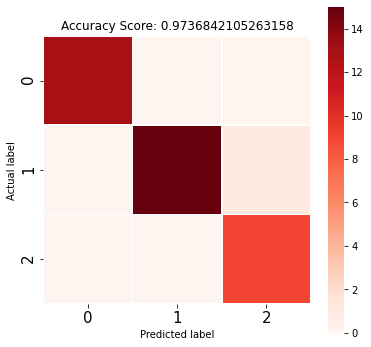

In [22]:
#Confusion Matrix 

plt.figure(figsize=(6,6))
c_mtx = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(c_mtx, linewidths=.5, square=True, cmap="Reds")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {}'.format(acc_score));
plt.tick_params(labelsize= 15)

In [31]:
#List of values to try for max_depth
max_depth = list(range(1, 6))

#List to store the average RMSE for each value of max_depth
accuracy = []

for depth in max_depth:
    
    dTree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    dTree.fit(X_train, y_train)
    score = dTree.score(X_test, y_test)
    accuracy.append(score)

Text(0.5, 1.0, 'Accuracy score: Depth-wise')

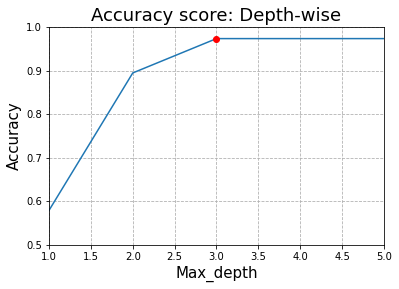

In [32]:
#plotting accuracy score depth wise

plt.plot(max_depth, accuracy) 
plt.plot(3, acc_score, marker='o', color='red') #adds the point
plt.xlim([1, 5])
plt.ylim([.50, 1.00])
plt.grid(True, axis = 'both', zorder = 0, linestyle = '--') #adds a grid to the plot
plt.ylabel('Accuracy', fontsize = 15) 
plt.xlabel('Max_depth', fontsize = 15)
plt.title('Accuracy score: Depth-wise', fontsize = 18)


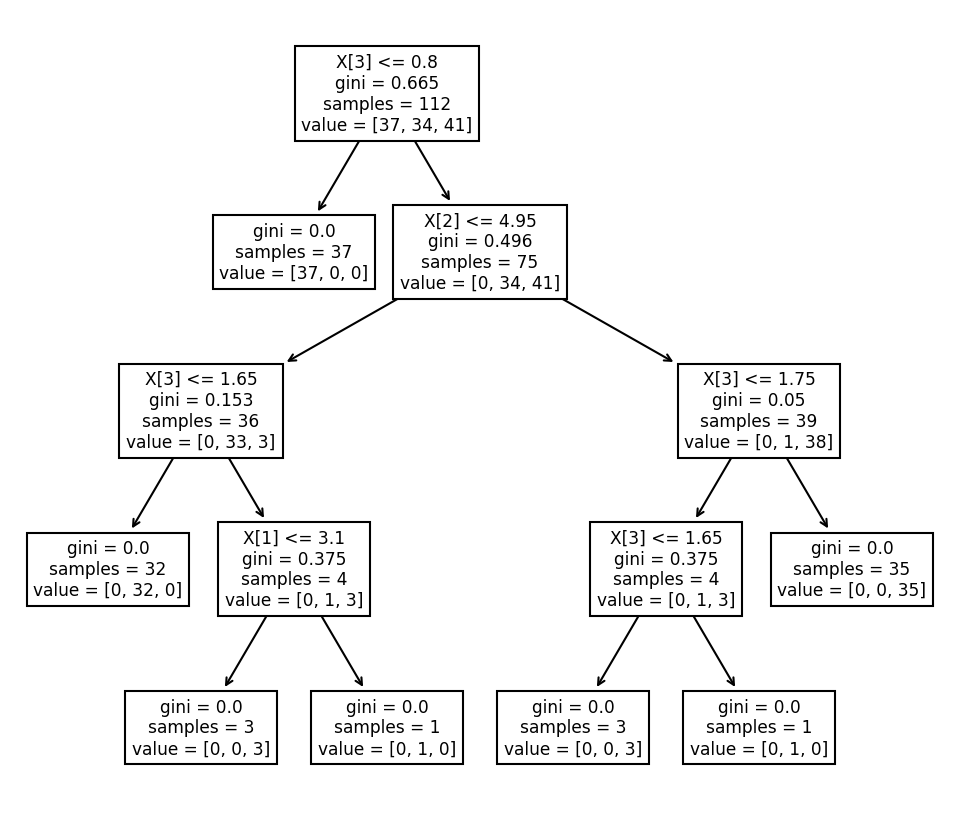

In [40]:
# Visualize the decision tree graph

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (8,7), dpi = 150)
tree.plot_tree(dTree);

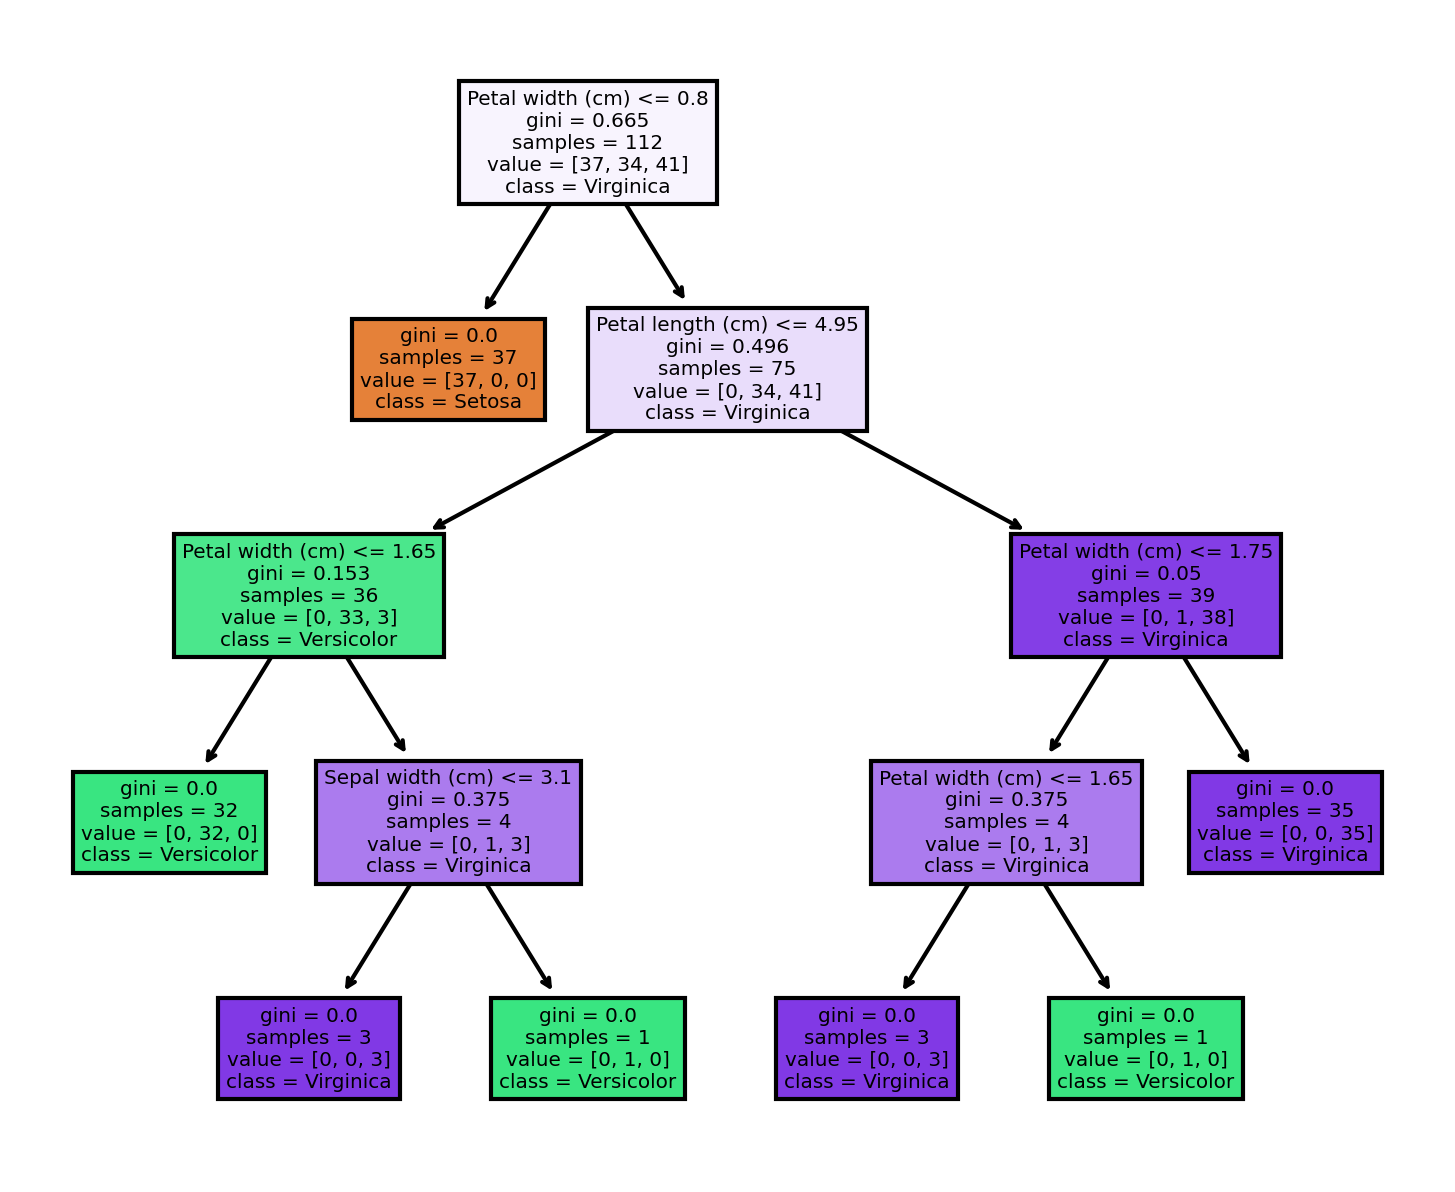

In [39]:
# Putting the feature names and class names into variables

features = ['Sepal length (cm)','Sepal width (cm)','Petal length (cm)','Petal width (cm)']
classes = ['Setosa', 'Versicolor', 'Virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5), dpi = 300)
tree.plot_tree(dTree, feature_names = features, class_names=classes, filled = True);

Now we can feed any new/test data to this classifer and it would be able to 
predict the right class accordingly.

**Conclusion:**

- After Importing, Fit our dataset in our model, accuracy is 97.368%.
- Model performance can be assessed by confusion matrix & classification report.
- We can conclude from depth wise graph that optimal depth for model is 3.